In [79]:
import lichess.api
from lichess.format import PYCHESS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from datetime import datetime
import pandas as pd

In [2]:
user = lichess.api.user('GarethC13')
print(user['perfs']['bullet']['rating'])

1886


In [3]:
# gameslist = list(lichess.api.user_games('GarethC13', max=3000, perfType='bullet'))
# with open('gameslist.pkl', 'wb') as f:
#     pickle.dump(gameslist, f)
with open('gameslist.pkl', 'rb') as f:
    gameslist = pickle.load(f)
    
whitegames = [game for game in gameslist if game['players'].get('white').get('user').get('id') == 'garethc13']
blackgames = [game for game in gameslist if game['players'].get('white').get('user').get('id') != 'garethc13']
print(len(gameslist),'total bullet games.')
print(len(whitegames),'as white.')
print(len(blackgames),'as black.')

3000 total bullet games.
1505 as white.
1495 as black.


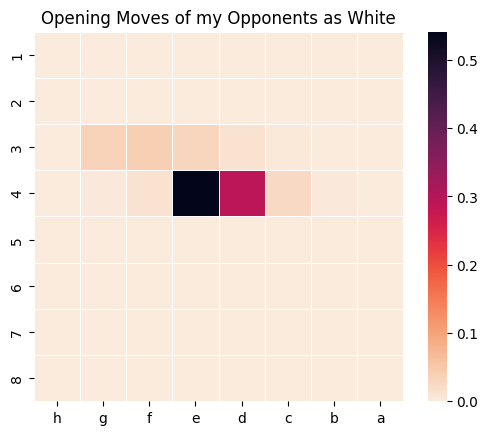

1484

In [84]:
move = ['a3','a4','b3','b4','c3','c4','d3','d4','e3','e4','f3','f4','g3','g4','h3','h4','Nf3','Nb3','Na3','Nh3']
squares = [[2,7],[3,7],[2,6],[3,6],[2,5],[3,5],[2,4],[3,4],[2,3],[3,3],[2,2],[3,2],[2,1],[3,1],[2,0],[3,0],
           [2,2],[2,6],[2,7],[2,0]]
values = [sum(1 for i in blackgames if i['moves'].split()[0] == m) for m in move]
data = np.zeros([8, 8])
data[[s[0] for s in squares], [s[1] for s in squares]] = values
data_avg = data/sum(sum(data))   

cmap = sns.cm.rocket_r
x_axis_labels = ['h','g','f','e','d','c','b','a']
y_axis_labels = [*range(1,9)]
ax = sns.heatmap(data_avg, square=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap=cmap, linewidth=0.5)
plt.title('Opening Moves of my Opponents as White')
plt.savefig('openings.png')
plt.show()
sum(values)

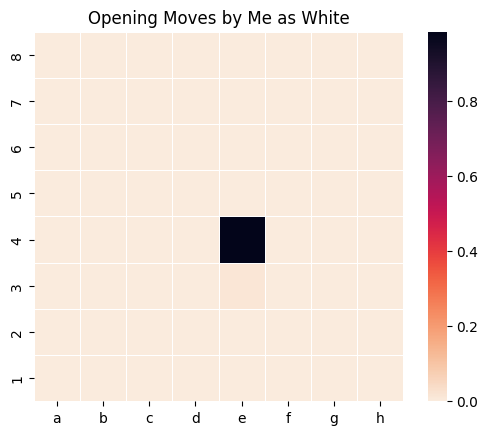

[0, 0, 3, 0, 0, 0, 0, 1, 21, 1477, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]


In [85]:
move = ['a3','a4','b3','b4','c3','c4','d3','d4','e3','e4','f3','f4','g3','g4','h3','h4','Nf3','Nb3','Na3','Nh3']
squares = [[2,7],[3,7],[2,6],[3,6],[2,5],[3,5],[2,4],[3,4],[2,3],[3,3],[2,2],[3,2],[2,1],[3,1],[2,0],[3,0],
           [2,2],[2,6],[2,7],[2,0]]
values = [sum(1 for i in whitegames if i['moves'].split()[0] == m) for m in move]
data = np.zeros([8, 8])
data[[s[0] for s in squares], [s[1] for s in squares]] = values
data_avg = data/sum(sum(data))    
    
x_axis_labels = ['h','g','f','e','d','c','b','a']
y_axis_labels = [*range(1,9)]

ax = sns.heatmap(data_avg,square=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap=cmap, linewidth=0.5)
plt.title('Opening Moves by Me as White')
ax.invert_xaxis()
ax.invert_yaxis()
plt.show()
print(values)

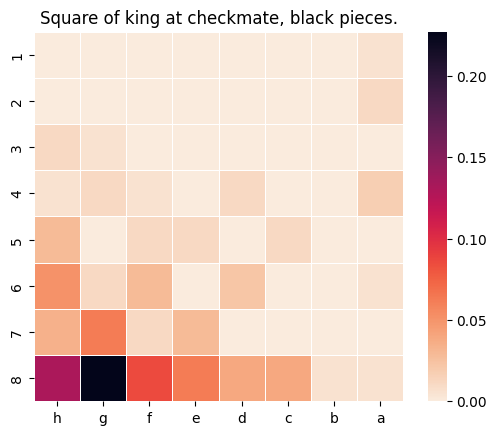

In [7]:
letters = ['a','b','c','d','e','f','g','h']
move = [i + str(j) for i in letters for j in range(1, 9)]
values = [0]*64
squares = [[i, x] for x in range(7, -1, -1) for i in range(8)]

for x in blackgames:
    if x['status'] == 'mate' and x['winner'] == 'white':
        y = list(x['moves'].split(' '))[1::2]
        king = 0
        for i in y:
            if i[0] == 'K':
                king = i[-2:]
            elif i == 'O-O':
                king = 'g8'
            elif i == 'O-O-O':
                king = 'c8'
        for m,v in zip(move,range(64)):
            if m == king:
                values[v] += 1
        if king == 0:
            values[39] += 1
            
data = np.zeros([8,8])
data[[s[0] for s in squares], [s[1] for s in squares]] = values

x_axis_labels = ['h','g','f','e','d','c','b','a']
y_axis_labels = [*range(1,9)]
data = data/(sum(sum(data)))
ax = sns.heatmap(data, square=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap=cmap, linewidth=0.5)
plt.title('Square of king at checkmate, black pieces.')
plt.savefig('blackmate.png')
plt.show()

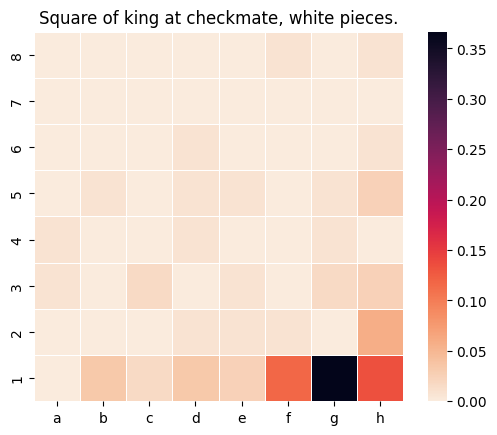

In [8]:
letters = ['a','b','c','d','e','f','g','h']
move = [i + str(j) for i in letters for j in range(1, 9)]
values = [0]*64
squares = [[i, x] for x in range(7, -1, -1) for i in range(8)]
        
for x in whitegames:
    if x['status'] == 'mate' and x['winner'] == 'black':
        y = list(x['moves'].split(' '))[0::2]
        king = 0
        for i in y:
            if i[0] == 'K':
                king = i[-2:]
            elif i == 'O-O':
                king = 'g1'
            elif i == 'O-O-O':
                king = 'c1'
        for m,v in zip(move,range(64)):
            if m == king:
                values[v] += 1
        if king == 0:
            values[32] += 1
            
data = np.zeros([8,8])
data[[s[0] for s in squares], [s[1] for s in squares]] = values

x_axis_labels = ['h','g','f','e','d','c','b','a']
y_axis_labels = [*range(1,9)]
data = data/(sum(sum(data)))
ax = sns.heatmap(data, square=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap=cmap, linewidth=0.5)
plt.title('Square of king at checkmate, white pieces.')
ax.invert_xaxis()
ax.invert_yaxis()
plt.savefig('whitemate.png')
plt.show()

My average rating: 1772.83 



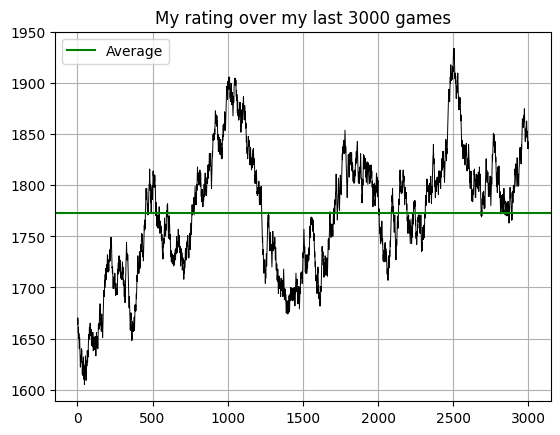

In [9]:
my_rating = [game['players'].get('white').get('rating') if game['players'].get('white').get('user').get('id') == 'garethc13' else
           game['players'].get('black').get('rating') for game in gameslist]
my_rating.reverse()

plt.plot([*range(1,3001)], my_rating, color='k', linewidth=0.7)
plt.axhline(y=np.mean(my_rating), color='g', label="Average")
plt.title("My rating over my last 3000 games")
plt.legend()
plt.grid()
print("My average rating:", round(np.mean(my_rating), 2), "\n")

My average rating: 1774.43 



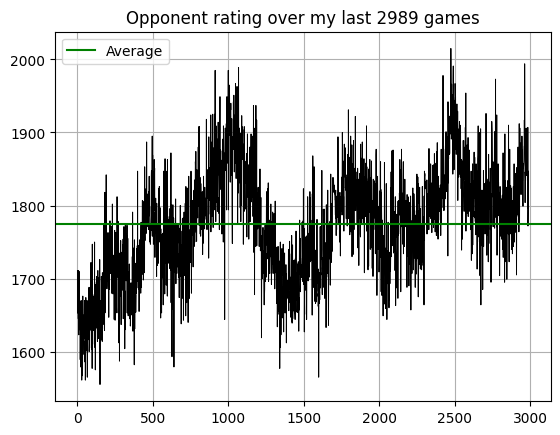

In [10]:
opponent_rating = [game['players'].get('white').get('rating') if game['players'].get('white').get('user').get('id') != 'garethc13' else
           game['players'].get('black').get('rating') for game in gameslist]
opponent_rating.reverse()
adjusted_opponent_rating = [r for r in opponent_rating if r > 1550] # remove games against lower rated friends

plt.plot([*range(1,len(adjusted_opponent_rating) + 1)], adjusted_opponent_rating, color='k', linewidth=0.7)
plt.axhline(y = np.mean(adjusted_opponent_rating), color='g', label="Average")
plt.title(f"Opponent rating over my last {len(adjusted_opponent_rating)} games")
plt.legend()
plt.grid()
print("My average rating:", round(np.mean(adjusted_opponent_rating), 2), "\n")

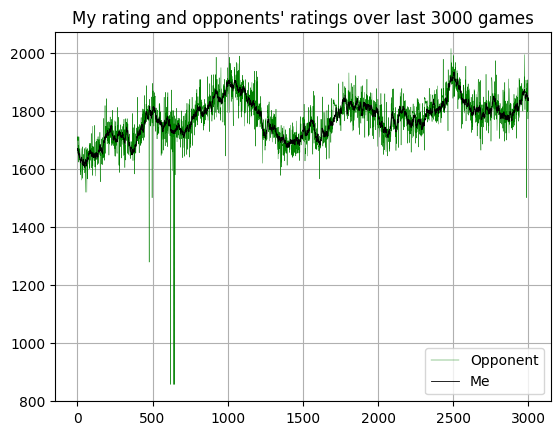

In [77]:
plt.plot([*range(1,3001)], opponent_rating, color='g', linewidth=0.3, label="Opponent")
plt.plot([*range(1,3001)], my_rating, color='k', linewidth=0.6, label="Me")
plt.title("My rating and opponents' ratings over last 3000 games")
plt.legend()
plt.grid()
plt.show()

In [90]:
hour_dict = {key: {'total':0,'win':0,'draw':0,'loss':0} for key in range(24)}

for game in gameslist:
    time = datetime.utcfromtimestamp(game.get('createdAt')/1000).hour
    colour = "white" if game.get('players').get('white').get('user').get('id') == "garethc13" else "black"
    winner = game.get('winner')
    result = "win" if colour == winner else("draw" if winner == None else "loss")
    hour_dict[time][result] += 1
    hour_dict[time]['total'] += 1
    
hour_dict

{0: {'total': 60, 'win': 25, 'draw': 3, 'loss': 32},
 1: {'total': 11, 'win': 8, 'draw': 0, 'loss': 3},
 2: {'total': 2, 'win': 1, 'draw': 0, 'loss': 1},
 3: {'total': 1, 'win': 0, 'draw': 0, 'loss': 1},
 4: {'total': 0, 'win': 0, 'draw': 0, 'loss': 0},
 5: {'total': 0, 'win': 0, 'draw': 0, 'loss': 0},
 6: {'total': 7, 'win': 3, 'draw': 1, 'loss': 3},
 7: {'total': 35, 'win': 21, 'draw': 0, 'loss': 14},
 8: {'total': 58, 'win': 23, 'draw': 1, 'loss': 34},
 9: {'total': 132, 'win': 68, 'draw': 4, 'loss': 60},
 10: {'total': 168, 'win': 80, 'draw': 6, 'loss': 82},
 11: {'total': 224, 'win': 107, 'draw': 14, 'loss': 103},
 12: {'total': 214, 'win': 102, 'draw': 10, 'loss': 102},
 13: {'total': 251, 'win': 125, 'draw': 12, 'loss': 114},
 14: {'total': 276, 'win': 138, 'draw': 8, 'loss': 130},
 15: {'total': 230, 'win': 98, 'draw': 12, 'loss': 120},
 16: {'total': 193, 'win': 99, 'draw': 4, 'loss': 90},
 17: {'total': 208, 'win': 96, 'draw': 8, 'loss': 104},
 18: {'total': 186, 'win': 87, '

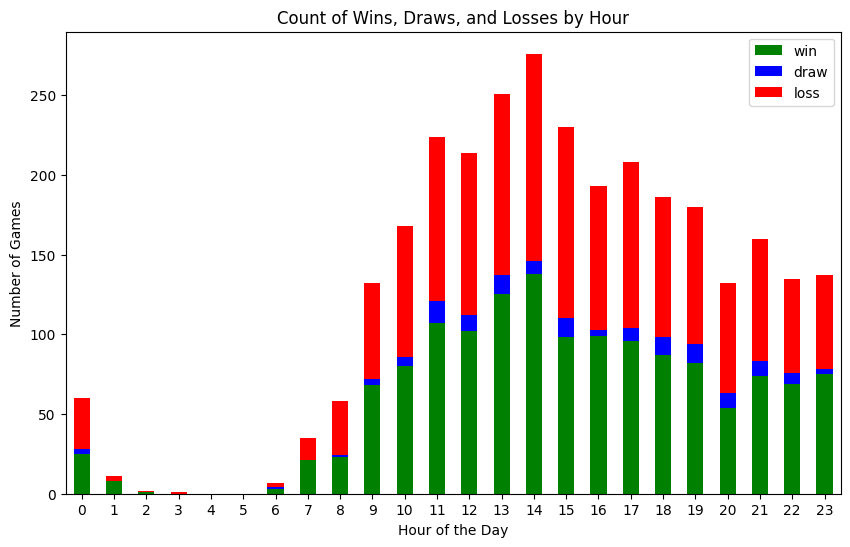

In [111]:
df = pd.DataFrame(hour_dict).T

fig, ax = plt.subplots(figsize=(10, 6))
df[['win', 'draw', 'loss']].plot(kind='bar', stacked=True, ax=ax, color=['green', 'blue', 'red'])
plt.xlabel("Hour of the Day")
plt.xticks(rotation=0)
plt.ylabel("Number of Games")
plt.title("Count of Wins, Draws, and Losses by Hour")
plt.show()

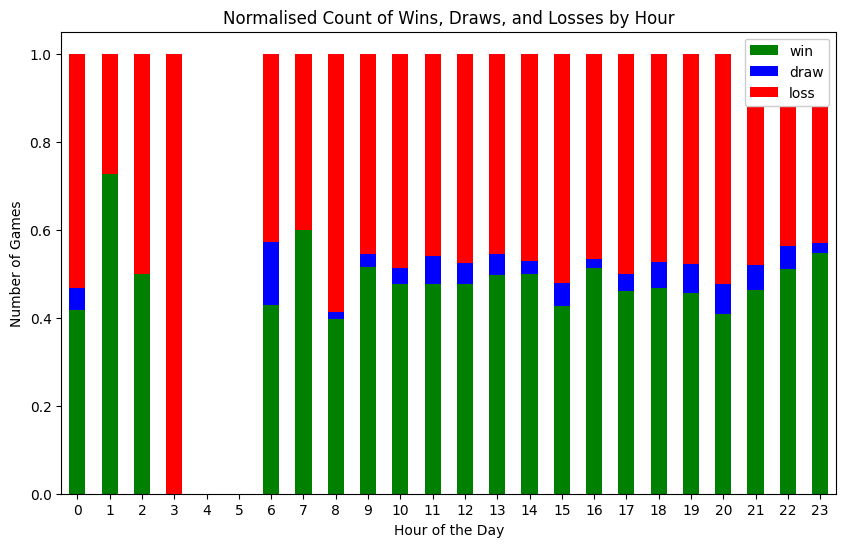

In [110]:
df = pd.DataFrame(hour_dict).T
df[['win', 'draw', 'loss']] = df[['win', 'draw', 'loss']].div(df['total'], axis=0)

fig, ax = plt.subplots(figsize=(10, 6))
df[['win', 'draw', 'loss']].plot(kind='bar', stacked=True, ax=ax, color=['green', 'blue', 'red'])
plt.xlabel("Hour of the Day")
plt.xticks(rotation=0)
plt.ylabel("Number of Games")
plt.title("Normalised Count of Wins, Draws, and Losses by Hour")
plt.legend(framealpha=1)
plt.show()

In [112]:
# wins, losses, draws by day
# how games end
# animation of game moves?
# average game length and number of moves
gameslist[1000]

{'id': 'S2vNwbxQ',
 'rated': True,
 'variant': 'standard',
 'speed': 'bullet',
 'perf': 'bullet',
 'createdAt': 1702485677070,
 'lastMoveAt': 1702485797979,
 'status': 'mate',
 'source': 'pool',
 'players': {'white': {'user': {'name': 'GarethC13', 'id': 'garethc13'},
   'rating': 1800,
   'ratingDiff': -6},
  'black': {'user': {'name': 'GGmYAgnesh', 'id': 'ggmyagnesh'},
   'rating': 1815,
   'ratingDiff': 6}},
 'winner': 'black',
 'moves': 'e4 e5 Nf3 Nc6 d4 d6 d5 Nce7 Nc3 c6 dxc6 Nxc6 Bb5 Bd7 O-O Nf6 Bg5 Be7 Nd5 Nxd5 Qxd5 Bxg5 Nxg5 Qxg5 Qxd6 a6 Bxc6 Bxc6 Rad1 Qe7 Qxe7+ Kxe7 c4 Rhd8 Rde1 Rd6 Re2 Rg6 f3 Rd8 b3 Rdd6 Rc1 Rg5 g4 Rdg6 Rg2 h5 Rd1 hxg4 fxg4 Rxg4 Rxg4 Rxg4+ Kf2 Rxe4 Rg1 g6 Rd1 Rh4 Kg3 Rf4 h4 Rf3+ Kg4 Rf4+ Kg3 f5 Re1 Rg4+ Kh3 e4 h5 gxh5 Rf1 Kf6 Re1 Ke5 Rd1 f4 Rd5+ Bxd5 cxd5 Kxd5 Kh2 e3 b4 e2 a3 e1=Q b5 Qg3+ Kh1 Qg2#',
 'clock': {'initial': 60, 'increment': 0, 'totalTime': 60}}